# Finding Contours

### Import resources and display image

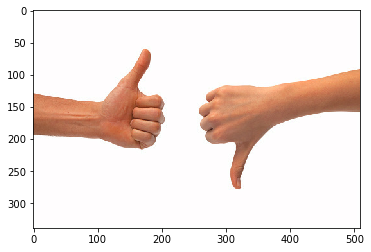

In [37]:
import os
os.chdir(r'C:\Users\atavares\PycharmProjects\ComputerVision')

# import required libraries for this section
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in the image
image = cv2.imread('data/images/thumbs_up_down.jpg')

# Convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make a copy of the image
image_copy = np.copy(image)

plt.imshow(image)

## Produce a binary image for finding contours

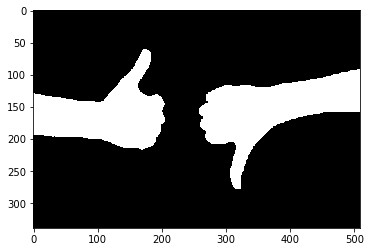

In [38]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

## Find and draw the contours

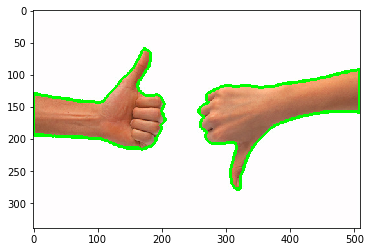

In [39]:
# Find contours from thresholded, binary image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE,
                                              cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0, 255, 0), 3)

plt.imshow(contours_image)

In [43]:
def orientations(contours):
    """
    Return the orientations of a list of contours
    :param contours: list of contours
    :return: angles, the orientations of the contours
    """

    # Create an empty list to store the angles in
    angles = []
    for contour in contours:
        (x, y), (MA, ma), angle = cv2.fitEllipse(contour)
        angles.append(angle)
    return angles
# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


## Bounding Rectangle

Find the bounding rectangle around the left hand contour, which has its thumb up,
then use that bounding rectangle to crop the image and better focus on that one hand.


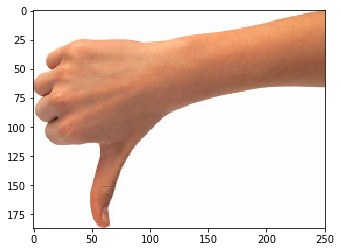

In [46]:
## it returns a new, cropped version of the original image
def left_hand_crop(image, selected_contour):
    """
    Left hand crop
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """

    ## TODO: Detect the bounding rectangle of the left hand contour
    # Find the bounding rectangle of a selected contour
    x,y,w,h = cv2.boundingRect(selected_contour)

    ## TODO: Crop the image using the dimensions of the bounding rectangle
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    # Draw the bounding rectangle as a purple box
    box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)

    # Crop using the dimensions of the bounding rectangle (x, y, w, h)
    cropped_image = image[y: y + h, x: x + w]

    return cropped_image


## TODO: Select the left hand contour from the list
## Replace this value
selected_contour =  contours[0]


# ---------------------------------------------------------- #
# If you've selected a contour
if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)